# Image Processing Notebook

In [1]:
import sys
sys.path.append('../')

from MRIsegm.utils import get_slices, get_rois, display_images
from MRIsegm.processing import otsu_thresholding, show_image_histogram, denoise_nlm, compare_denoised_histo

## Loading data

In [2]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patient = 'BO16/'
try:
    dir_path =  src + patient + 'T2AX'
except:
    dir_path =  src + patient + 'T2'

slices = get_slices(dir_path=dir_path) 

print(f"number of slices = {slices.shape[0]}")
roi_path = src + patient + 'T2ROI'

rois = get_rois(roi_path=roi_path) 
positions = [rois[i].get('position') - 1 for i in range(len(rois))]

# set(positions) to have unique values
print(f"number of masks = {len(set(positions))}")

number of slices = 24
number of masks = 7


## Image histogram

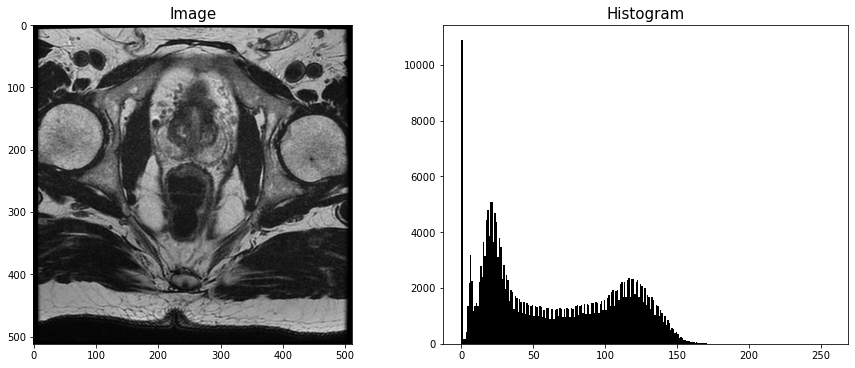

In [3]:
layer = 14
img = slices[layer,: ,:]

show_image_histogram(img)


## Denoising

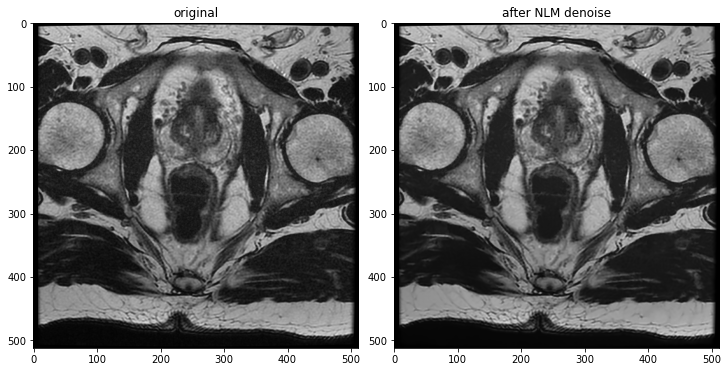

In [8]:
alpha = 3
img = slices[layer,: ,:]

denoise_nlm(img, alpha=alpha, show=True, figsize=(10,5))

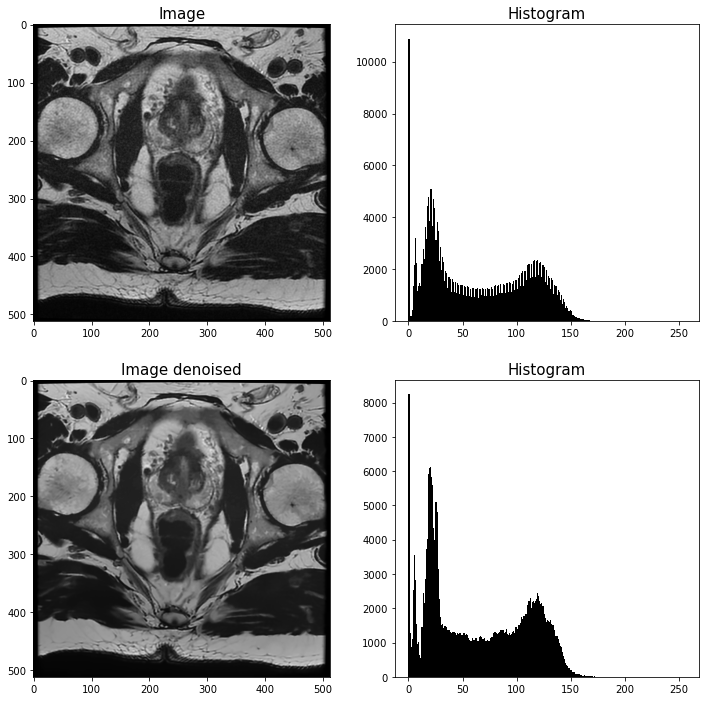

In [7]:
compare_denoised_histo(img, alpha, figsize=(12, 12))

## CLAHE

In [9]:
import cv2

img = denoise_nlm(img, alpha)
# create a CLAHE object (Arguments are optional).
clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe1.apply(img)
#cv2.imwrite('clahe_2.jpg',cl1)

print(f'shape = {cl1.shape},',f'type = {cl1.dtype}')

shape = (512, 512), type = uint8


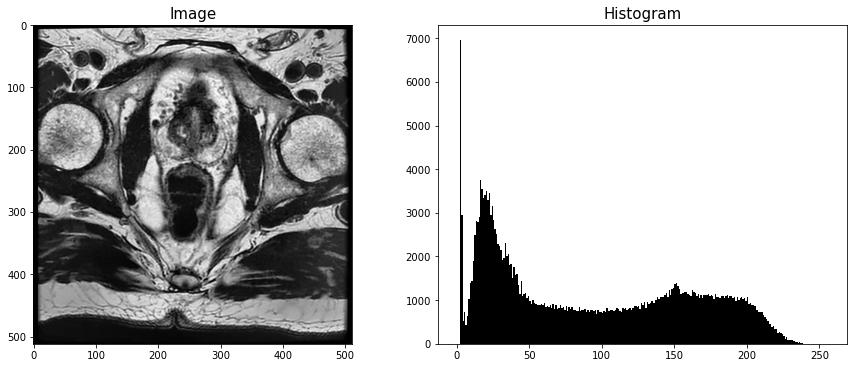

In [10]:
show_image_histogram(cl1)

## Otsu thresholding

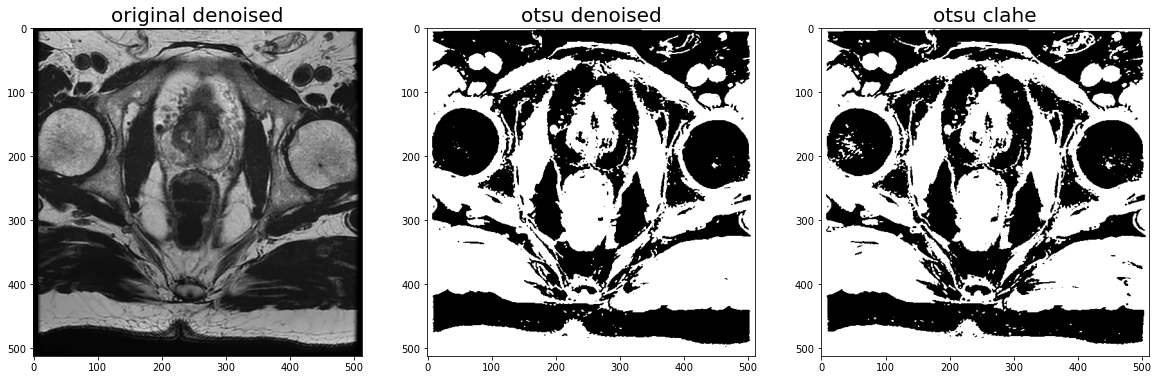

In [11]:
layer = 14
img = slices[layer,: ,:]
denoised_img = denoise_nlm(img, alpha=alpha)
otsu = otsu_thresholding(denoised_img)
otsu_clae = otsu_thresholding(cl1)


display_images([denoised_img, otsu, otsu_clae], figsize=(20,10), titles=['original denoised','otsu denoised', 'otsu clahe'], fontsize=20)
